<a href="https://colab.research.google.com/github/optimisticace2003/BreakingBug-ML/blob/main/Breaking_Bug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving dataset.csv to dataset (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
Mean 53.51086956521739
Median 54.0
Mode 0    54
Name: age, dtype: int64


Male percentage i the data: 78.91%
Female percentage in the data : 21.09%
Males are 274.23% more than female in the data.


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


___________________________________________________________
Mean of the dataset: 
dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
___________________________________________________________
Median of the dataset: 
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
___________________________________________________________
Mode of the dataset: 
dataset         
Cleveland      0    58
Hungary        0    54
Switzerland    0    61
VA Long Beach  0    62
               1    63
Name: age, dtype: int64
___________________________________________________________


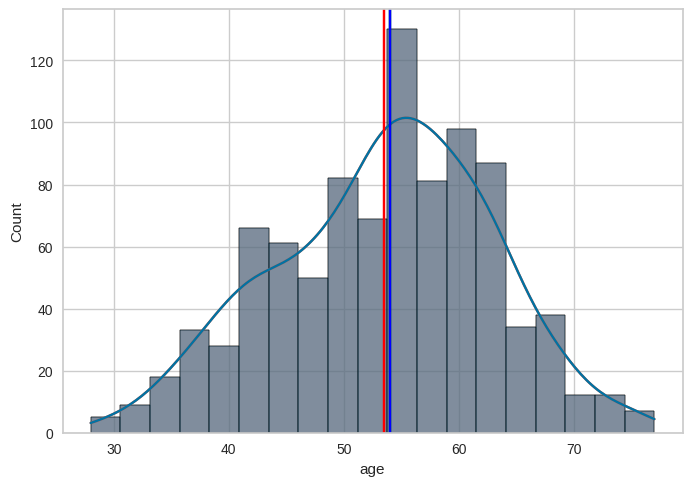

In [ ]:



import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap


from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


#//*************sklearn importing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#from sklearn import LogisticRegressions to from sklearn.linear_model import LogisticRegression

# bug in from sklearn import KNN
from sklearn.linear_model import LogisticRegression

# bug in from sklearn import KNN
from sklearn.neighbors import KNeighborsClassifier

# bug inSVC error in SVC_classifier
from sklearn.svm import SVC

# bug in sklearn to sklearn.tree and DecisionTree, plot_tree_regressor to DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# bug in error in adaboost,gradientboost to AdaBoostClassifier, GradientBoostingClassifier add RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# bug in XG TO XGBClassifier
import xgboost as xgb

# bug in LGBM to LGBMClassifier
from lightgbm import LGBMClassifier

# bug in LGBM to LGBMClassifier
import lightgbm as lgb

# bug in # gaussian to NB
from sklearn.naive_bayes import GaussianNB

# bug in  accuracy, confusion, classification to accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files


uploaded = files.upload()
df = pd.read_csv("dataset.csv")


df.head()


df.info()


df.shape


df['id'].min(), df['id'].max()


df['age'].min(), df['age'].max()


df['age'].describe()

import seaborn as sns


custom_colors = ["#FF5733", "#3366FF", "#33FF57"]


sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)


sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')


print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())




fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()


df['sex'].value_counts()



male_count = 726
female_count = 194

total_count = male_count + female_count


male_percentage = (male_count/total_count)*100

#error - female_percentages = (female_count/total_count)*100
female_percentages = (female_count/total_count)*100


print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')


difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')


726/194


df.groupby('sex')['age'].value_counts()


df['dataset'].value_counts()                      #**************counts to value_counts , dataseet to dataset


fig =px.bar(df, x='dataset', color='sex')
fig.show()

# print the values of dataset column groupes by sex
print (df.groupby('sex')['dataset'].value_counts())

# make a plot of age column using plotly and coloring by dataset

fig = px.histogram(data_frame=df, x='age', color= 'dataset')
fig.show()

print("___________________________________________________________")
print("Mean of the dataset: ")
print(df.groupby('dataset')['age'].mean())
print("___________________________________________________________")
print("Median of the dataset: ")
print(df.groupby('dataset')['age'].median())
print("___________________________________________________________")
print("Mode of the dataset: ")
print(df.groupby('dataset')['age'].apply(pd.Series.mode))  #****************groupby need to be added
print("___________________________________________________________")

Percentage of missing values in trestbps column: 6.41%
Missing values in trestbps column: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
The missing values in thal column are

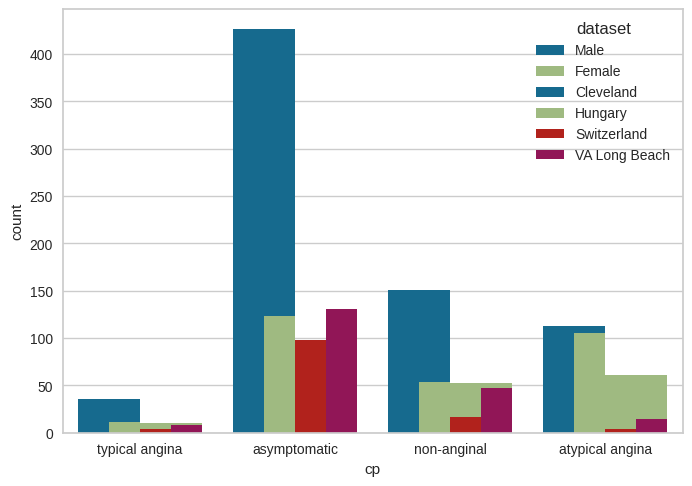

In [ ]:

df['cp'].value_counts()


sns.countplot(df, x='cp', hue= 'sex')


sns.countplot(df,x='cp',hue='dataset')


fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

df['trestbps'].describe()

print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() /len(df) *100:.2f}%")


imputer1 = IterativeImputer(max_iter=10, random_state=42)

imputer1.fit(df[['trestbps']])

df['trestbps'] = imputer1.transform(df[['trestbps']])


print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df.info()


(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)


imputer2 = IterativeImputer(max_iter=10, random_state=42)

# fit transform on ca,oldpeak, thal,chol and thalch columns
# Fit and transform on ca, oldpeak, chol, and thalch columns
df[['ca', 'oldpeak', 'chol', 'thalch']] = imputer2.fit_transform(df[['ca', 'oldpeak', 'chol', 'thalch']])   #*********** change imputer to imputer2.fit_transformer.Applied fit_transform to the subset of columns rather than individual columns.




(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")

df['thal'].value_counts()

df.tail()

missing_values = df.isnull().sum()
print("Missing values:")                    #*******************Replaced null to isnull, Removed the incorrect expression, changed to sort_values(ascending=True)
print(missing_values[missing_values > 0].sort_values(ascending=True))



In [ ]:
def impute_continuous_missing_data(passed_col):


    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]




    onehotencoder = OneHotEncoder(sparse=False, drop='first')


    categorical_cols = X.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        X[col] = onehotencoder.fit_transform(X[[col]].astype(str))

    imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=16), add_indicator=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")


    X_null = df_null.drop(passed_col, axis=1)


    categorical_cols_null = X_null.select_dtypes(include=['object']).columns
    for col in categorical_cols_null:
        X_null[col] = onehotencoder.transform(X_null[[col]].astype(str))


    X_null_imputed = imputer.transform(X_null)


    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X_null_imputed)


    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]


In [ ]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df.isnull().sum().sort_values(ascending=False)


import warnings
warnings.filterwarnings('ignore')

def impute_categorical_missing_data(col):
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)
    return df[col]

def impute_continuous_missing_data(col):
    imputer = IterativeImputer(max_iter=10, random_state=42)
    df[[col]] = imputer.fit_transform(df[[col]])
    return df[col]



for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2)) + "%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

df.isnull().sum().sort_values(ascending=False)


print("_________________________________________________________________________________________________________________________________________________")

Missing Values fbs : 9.78%
Missing Values restecg : 0.22%
Missing Values exang : 5.98%
Missing Values slope : 33.59%
Missing Values thal : 52.83%
_________________________________________________________________________________________________________________________________________________


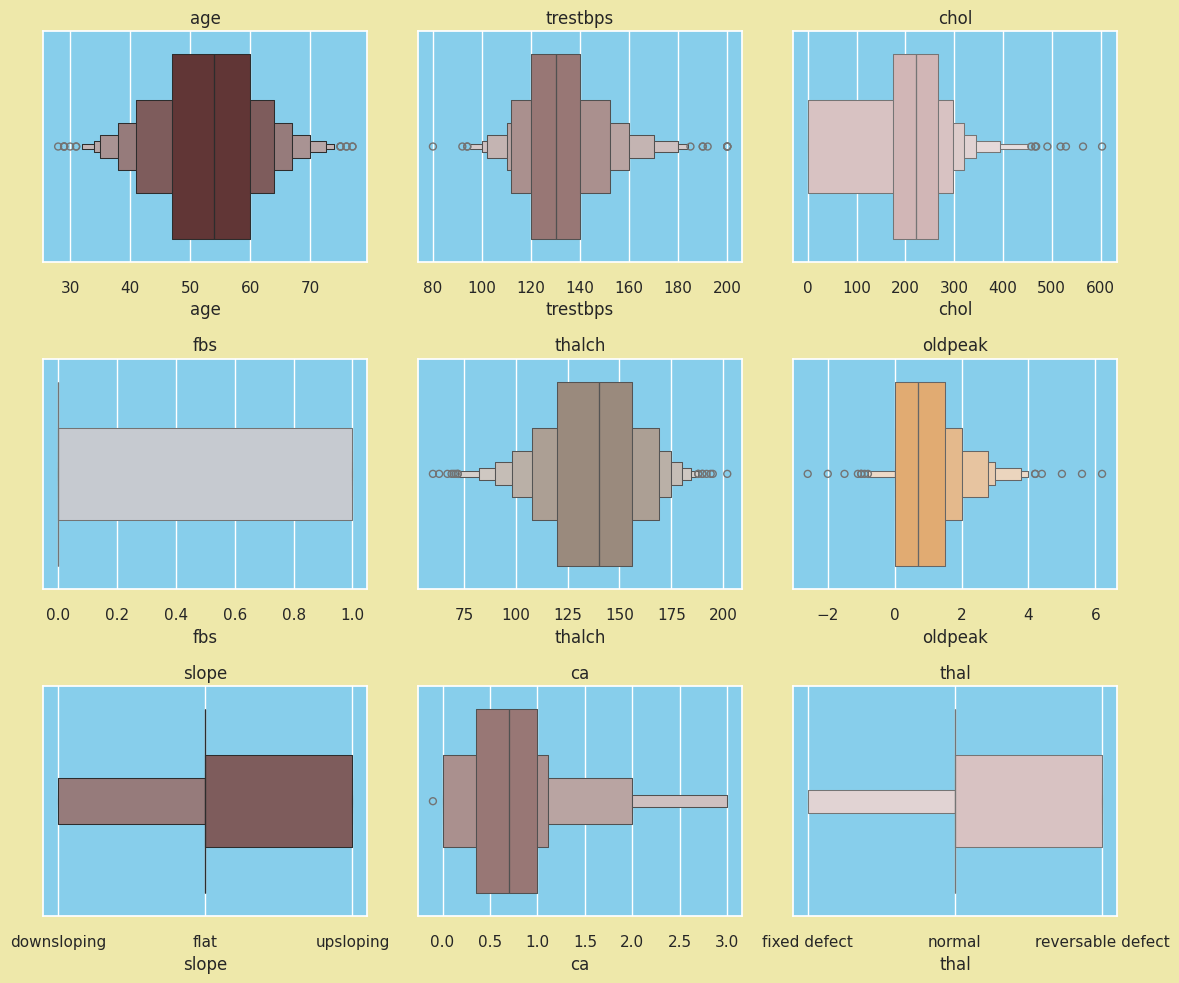

Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []


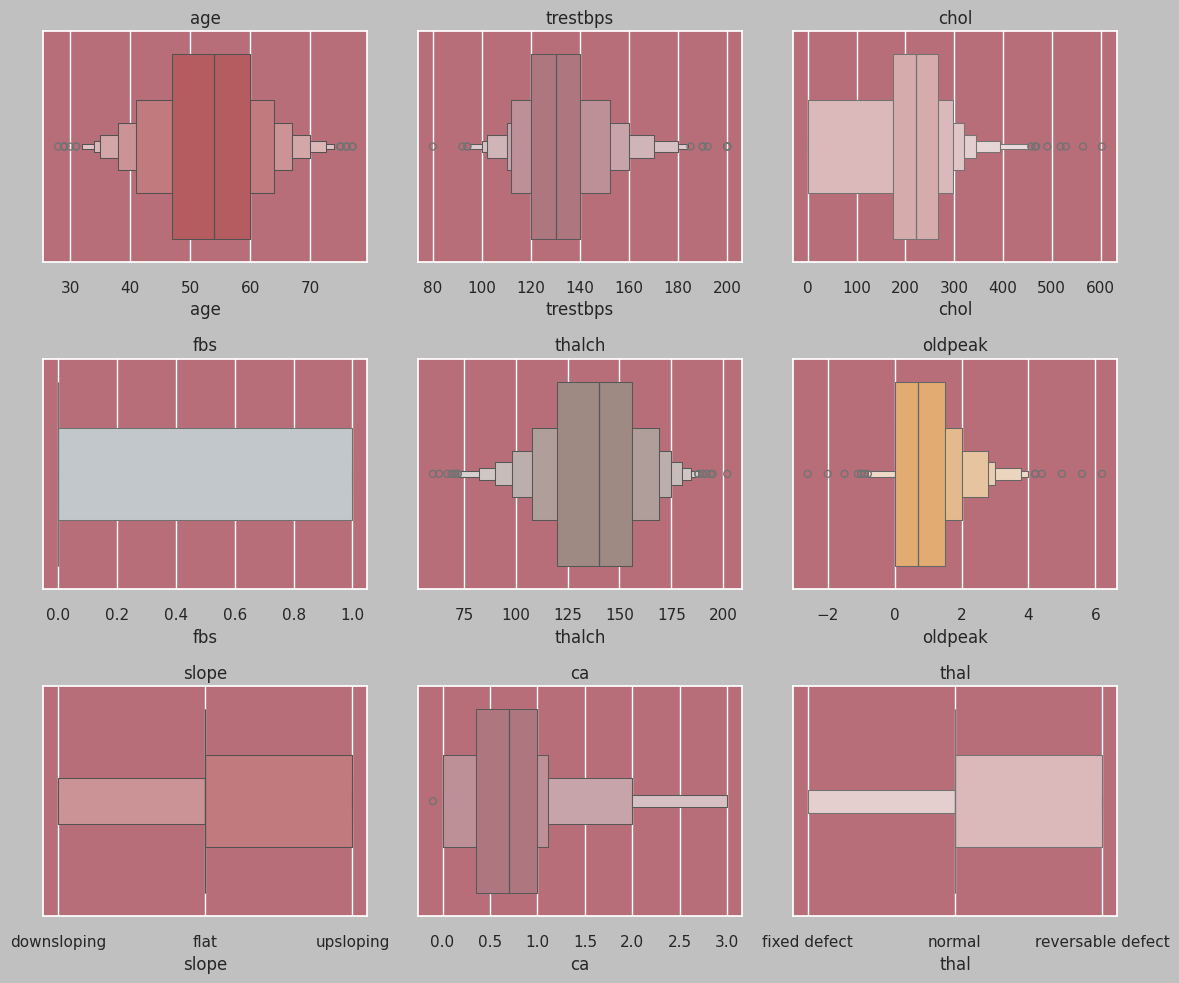

count    919.000000
mean     132.276183
std       17.930662
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64
               id         age    trestbps        chol      thalch     oldpeak  \
count  919.000000  919.000000  919.000000  919.000000  919.000000  919.000000   
mean   460.180631   53.509249  132.276183  199.248383  137.514240    0.877767   
std    265.693391    9.429689   17.930662  108.919007   25.187818    1.054374   
min      1.000000   28.000000   80.000000    0.000000   60.000000   -2.600000   
25%    230.500000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.000000   54.000000  130.000000  222.000000  140.000000    0.700000   
75%    689.500000   60.000000  140.000000  267.000000  156.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  919.000000  919.000000  
mean     0.7131

In [ ]:



cols = ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'slope', 'ca', 'thal']  # Example columns, update as needed


sns.set(rc={"axes.facecolor": "#87CEEB", "figure.facecolor": "#EEE8AA"})


palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(palette)

plt.figure(figsize=(12, 10))

for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)  # Adjust the grid size (3 rows x 3 columns) as needed
    sns.boxenplot(data=df, x=col, color=palette[i % len(palette)])
    plt.title(col)

plt.tight_layout()
plt.show()


print(df[df['trestbps'] == 0])


df = df[df['trestbps'] != 0]


sns.set(rc={"axes.facecolor": "#B76E79", "figure.facecolor": "#C0C0C0"})

modified_palette = ["#C44D53", "#B76E79", "#DDA4A5", "#B3BCC4", "#A2867E", "#F3AB60"]
cmap = ListedColormap(modified_palette)


plt.figure(figsize=(12, 10))

for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxenplot(data=df, x=col, color=modified_palette[i % len(modified_palette)])
    plt.title(col)

plt.tight_layout()
plt.show()


print(df['trestbps'].describe())
print(df.describe())

print("___________________________________________________________________________________________________________________________________________________________________")


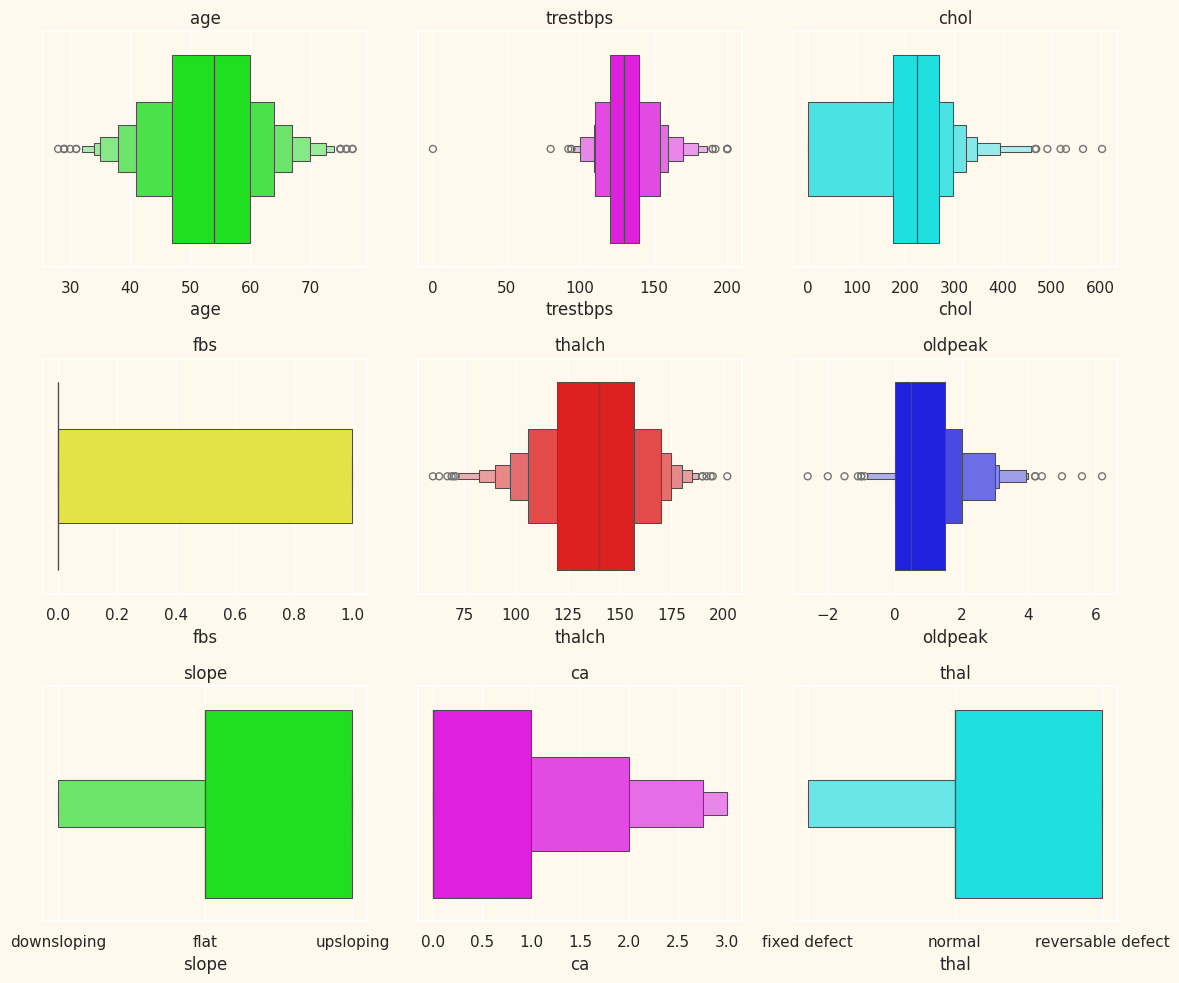

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64


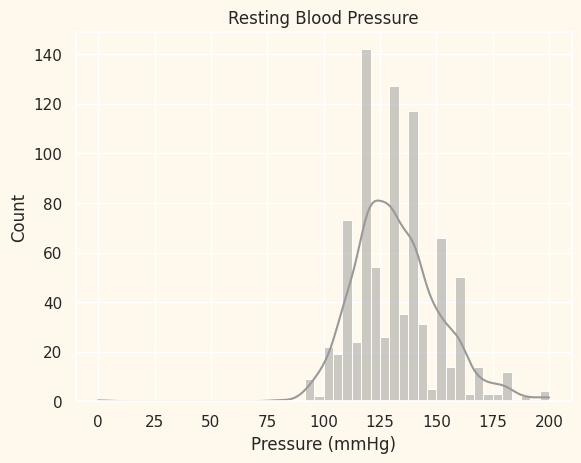

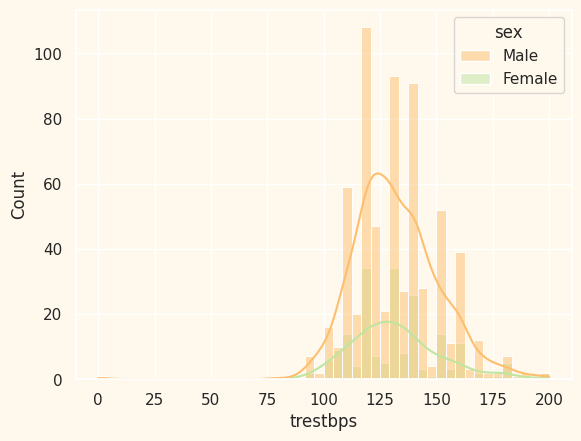

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slop

In [ ]:



cols = ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'slope', 'ca', 'thal']


sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

night_vision_palette = ["#00FF00", "#FF00FF", "#00FFFF", "#FFFF00", "#FF0000", "#0000FF"]

plt.figure(figsize=(12, 10))
for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxenplot(data=df, x=col, color=night_vision_palette[i % len(night_vision_palette)])
    plt.title(col)

plt.tight_layout()
plt.show()


print(df.age.describe())


palette = ["#999999", "#666666", "#333333"]

sns.histplot(data=df, x='trestbps', kde=True, color=palette[0])
plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')
plt.show()


sns.histplot(df, x='trestbps', kde=True, palette="Spectral", hue='sex')
plt.show()


print(df.info())
print(df.columns)
print(df.head())


X = df.drop('num', axis=1)
y = df['num']


encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = X.copy()


categorical_cols = ['thal']

for col in categorical_cols:

    encoded = encoder.fit_transform(X[[col]])

    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([col]))

    X_encoded = pd.concat([X_encoded, encoded_df], axis=1)

    X_encoded.drop(col, axis=1, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as Gaussian
from sklearn.svm import SVC as SVC_Classifier
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from xgboost import XGBClassifier as XG
from sklearn.ensemble import GradientBoostingClassifier as GradientBoost
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
from sklearn.metrics import accuracy_score
import pandas as pd


X, y = make_classification(n_samples=100, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#model names corrected
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB())
]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='most_frequent'), list(range(X.shape[1]))),

    ],
    remainder='passthrough'
)

best_model = None
best_accuracy = 0.0


for name, model in models:

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])


    scores = cross_val_score(pipeline, X_train, y_train, cv=5)


    mean_accuracy = scores.mean()


    pipeline.fit(X_train, y_train)


    y_pred = pipeline.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)


    print("Model:", name)
    print("Cross Validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print("Best Model:", best_model)

def evaluate_classification_models(X, y, categorical_columns):

    X_encoded = X.copy()
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)


    X_encoded = pd.get_dummies(X_encoded, columns=categorical_columns)


    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


    models = {
        "Logistic Regression": LogisticRegression(),
        "KNN": KNN(),
        "NB": Gaussian(),
        "SVM": SVC_Classifier(),
        "Decision Tree": DecisionTree(),
        "Random Forest": RandomForest(),
        "XGBoost": XG(),
        "GradientBoosting": GradientBoost(),
        "AdaBoost": AdaBoost()
    }


    results = {}
    best_model = None
    best_accuracy = 0.0
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = name

    return results, best_model


categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']
X = df[categorical_cols]
y = df['num']

results, best_model = evaluate_classification_models(X, y, categorical_cols)
print("Model accuracies:", results)
print("Best model:", best_model)

Model: Logistic Regression
Cross Validation Accuracy: 0.9714285714285715
Test Accuracy: 0.9333333333333333

Model: Gradient Boosting
Cross Validation Accuracy: 0.9285714285714286
Test Accuracy: 0.9333333333333333

Model: KNeighbors Classifier
Cross Validation Accuracy: 0.9428571428571428
Test Accuracy: 0.9333333333333333

Model: Decision Tree Classifier
Cross Validation Accuracy: 0.9428571428571428
Test Accuracy: 0.8333333333333334

Model: AdaBoost Classifier
Cross Validation Accuracy: 0.9285714285714285
Test Accuracy: 0.9333333333333333

Model: Random Forest
Cross Validation Accuracy: 0.9428571428571428
Test Accuracy: 0.9333333333333333

Model: XGboost Classifier
Cross Validation Accuracy: 0.9428571428571428
Test Accuracy: 0.9333333333333333

Model: Support Vector Machine
Cross Validation Accuracy: 0.9714285714285715
Test Accuracy: 0.9

Model: Naive Bayes Classifier
Cross Validation Accuracy: 0.9285714285714286
Test Accuracy: 0.9

Best Model: Pipeline(steps=[('preprocessor',
         

Model accuracies: {'Logistic Regression': 1.0, 'KNN': 0.9347826086956522, 'NB': 1.0, 'SVM': 1.0, 'Decision Tree': 1.0, 'Random Forest': 1.0, 'XGBoost': 1.0, 'GradientBoosting': 1.0, 'AdaBoost': 1.0}
Best model: Logistic Regression


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

def hyperparameter_tuning(X, y, categorical_columns, models):

    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)


    X_encoded = X.copy()
    for col in categorical_columns:
        X_encoded = X_encoded.join(pd.DataFrame(encoder.fit_transform(X[[col]]), columns=encoder.get_feature_names_out([col])))


    X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


    results = {}


    for model_name, model in models.items():

        param_grid = {}
        if model_name == 'Logistic Regression':
            param_grid = {'C': [0.1, 1, 10, 100]}
        elif model_name == 'KNN':
            param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'NB':
            param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
        elif model_name == 'SVM':
            param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
        elif model_name == 'Decision Tree':
            param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'Random Forest':
            param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'XGBoost':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}  # Changed 'parameter_grid' to 'param_grid'
        elif model_name == 'GradientBoosting':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
        elif model_name == 'AdaBoost':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}


        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)


        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)


        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

    return results


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import pandas as pd

def hyperparameter_tuning(X, y, categorical_columns, models):

    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)


    X_encoded = X.copy()
    for col in categorical_columns:

        encoded_cols = encoder.fit_transform(X[[col]])
        encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out([col]))
        X_encoded = X_encoded.join(encoded_df).drop(columns=[col])


    X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


    results = {}


    for model_name, model in models.items():

        param_distributions = {}
        if model_name == 'Logistic Regression':
            param_distributions = {'C': uniform(0.1, 100)}
        elif model_name == 'KNN':
            param_distributions = {'n_neighbors': randint(3, 10)}
        elif model_name == 'NB':
            param_distributions = {'var_smoothing': uniform(1e-9, 1e-6)}
        elif model_name == 'SVM':
            param_distributions = {'C': uniform(0.1, 100), 'gamma': uniform(0.1, 100)}
        elif model_name == 'Decision Tree':
            param_distributions = {'max_depth': [None, 10, 20, 30], 'min_samples_split': randint(2, 11)}
        elif model_name == 'Random Forest':
            param_distributions = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': randint(2, 11)}
        elif model_name == 'XGBoost':
            param_distributions = {'learning_rate': uniform(0.01, 0.2), 'n_estimators': [100, 200], 'max_depth': randint(3, 6)}
        elif model_name == 'GradientBoosting':
            param_distributions = {'learning_rate': uniform(0.01, 0.2), 'n_estimators': [100, 200], 'max_depth': randint(3, 6)}
        elif model_name == 'AdaBoost':
            param_distributions = {'learning_rate': uniform(0.01, 0.2), 'n_estimators': randint(50, 100)}


        randomized_search = RandomizedSearchCV(
            model, param_distributions, n_iter=5, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
        )
        randomized_search.fit(X_train, y_train)


        best_params = randomized_search.best_params_
        best_model = randomized_search.best_estimator_
        y_pred = best_model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)


        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

    return results


results = hyperparameter_tuning(X, y, categorical_cols, models)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print()


Model: Logistic Regression
Best hyperparameters: {'C': 37.55401188473625}
Accuracy: 1.0

Model: KNN
Best hyperparameters: {'n_neighbors': 5}
Accuracy: 0.9402173913043478

Model: NB
Best hyperparameters: {'var_smoothing': 3.755401188473625e-07}
Accuracy: 1.0

Model: SVM
Best hyperparameters: {'C': 37.55401188473625, 'gamma': 95.17143064099162}
Accuracy: 0.7228260869565217

Model: Decision Tree
Best hyperparameters: {'max_depth': 20, 'min_samples_split': 5}
Accuracy: 1.0

Model: Random Forest
Best hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 1.0

Model: XGBoost
Best hyperparameters: {'learning_rate': 0.0849080237694725, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 1.0

Model: GradientBoosting
Best hyperparameters: {'learning_rate': 0.0849080237694725, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 1.0

Model: AdaBoost
Best hyperparameters: {'learning_rate': 0.0849080237694725, 'n_estimators': 78}
Accuracy: 1.0

